# Recortes para os anos de 2008 a 2012
## Países da África

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import regression as reg

from scipy import stats
from matplotlib import pyplot as plt

import openpyxl

import netpixi
import cpnet

from graph_tool import spectral, centrality
from netpixi.integration.gt import *
from netpixi.integration.gt import Graph
from regression.integration.gt import *

In [4]:
data = pd.read_excel('./final_db.xlsx')
data

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


,Unnamed: 0.1,Unnamed: 0,country,idh_2000,idh_2001,idh_2002,idh_2003,idh_2004,idh_2005,idh_2006,...,rejected,betweenness,pop_cont,coreness,in_degree,out_degree,open,coreness_discreto,idh_2008_2012,idh_2001_2003
0,0,0,"China, Hong Kong SAR",0.830,0.838,0.845,0.854,0.865,0.874,0.886,...,7767,2.861034e-04,0,0.240278,830,16,9.654531,0,0.9050,0.845667
1,1,1,"China, Macao SAR",0.922,0.922,0.922,0.922,0.922,0.922,0.922,...,7,8.704008e-07,0,0.098611,10,3,58.823529,0,0.9220,0.922000
2,2,2,Afghanistan,0.350,0.353,0.384,0.393,0.409,0.418,0.429,...,243,2.351135e-03,0,0.120833,249,239198,50.609756,0,0.4690,0.376667
3,3,3,Albania,0.671,0.678,0.684,0.691,0.696,0.706,0.713,...,64,1.306107e-03,0,0.218056,158,14660,71.171171,0,0.7490,0.684333
4,4,4,Algeria,0.637,0.647,0.657,0.667,0.677,0.685,0.690,...,5511,5.926680e-03,0,0.222222,404,6174,6.830093,0,0.7180,0.657000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,220,220,Wallis and Futuna Islands,0.763,0.763,0.763,0.763,0.763,0.763,0.763,...,0,0.000000e+00,0,0.045833,0,0,0.000000,0,0.7630,0.763000
221,221,221,Western Sahara,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,0.000000e+00,0,0.004167,0,473,0.000000,0,0.0000,0.000000
222,222,222,Yemen,0.444,0.453,0.461,0.470,0.477,0.483,0.488,...,5730,5.728203e-03,0,0.194444,11977,10037,67.639916,0,0.5026,0.461333
223,223,223,Zambia,0.425,0.432,0.441,0.451,0.460,0.471,0.482,...,2454,9.805704e-04,0,0.166667,8280,295,77.138066,0,0.5260,0.441333


In [5]:
paises_africa =  pd.read_csv('./african_countries.csv')
lista_paises_africa = paises_africa['Afro_countries'].to_list()
lista_paises_africa[:5]

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso']

In [6]:
df_completo = pd.read_csv('../Projeto-rascunho/asylum_seekers.csv')
df_completo

/tmp/ipykernel_788/1764240694.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_completo = pd.read_csv('../Projeto-rascunho/asylum_seekers.csv')


,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5.0,0,0
1,2000,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8,0
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186.0,1235,1235
3,2000,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250.0,171,0
4,2000,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273.0,150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129715,2016,United States of America,Zimbabwe,G / IN,232,NaN,229,16,NaN,*,10,28,435,NaN
129716,2016,United States of America,Zimbabwe,G / EO,142,NaN,12,*,NaN,*,23,31,138,NaN
129717,2016,South Africa,Zimbabwe,G / AR,94,9,NaN,NaN,NaN,NaN,94,94,0,NaN
129718,2016,South Africa,Zimbabwe,G / FI,41238,4124,7964,73,NaN,7869,NaN,7942,41260,NaN


In [7]:
df_aresta = df_completo.loc[:, ['Country / territory of asylum/residence', 'Origin', 'decisions_recognized', 'Rejected', 'Year']]
df_aresta = df_aresta.rename(columns={'Origin': 'origin', 'Country / territory of asylum/residence': 'destiny', 'decisions_recognized': 'value', 'Rejected': 'rejected','Year' : 'year'})
df_aresta

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5,0,2000
1,South Africa,Afghanistan,0,0,2000
2,Uzbekistan,Afghanistan,747,112,2000
3,United States of America,Afghanistan,151,31,2000
4,United States of America,Afghanistan,182,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16,*,2016
129716,United States of America,Zimbabwe,*,*,2016
129717,South Africa,Zimbabwe,NaN,NaN,2016
129718,South Africa,Zimbabwe,73,7869,2016


In [8]:
df_aresta.value = pd.to_numeric(df_aresta['value'], errors = 'coerce').fillna(0)
df_aresta

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5.0,0,2000
1,South Africa,Afghanistan,0.0,0,2000
2,Uzbekistan,Afghanistan,747.0,112,2000
3,United States of America,Afghanistan,151.0,31,2000
4,United States of America,Afghanistan,182.0,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16.0,*,2016
129716,United States of America,Zimbabwe,0.0,*,2016
129717,South Africa,Zimbabwe,0.0,NaN,2016
129718,South Africa,Zimbabwe,73.0,7869,2016


In [9]:
df_rec_1 = df_completo.loc[:, ['Country / territory of asylum/residence', 'Origin', 'decisions_recognized', 'Rejected', 'Year']]
df_rec_1 = df_rec_1.rename(columns={'Origin': 'origin', 'Country / territory of asylum/residence': 'destiny', 'decisions_recognized': 'value', 'Rejected': 'rejected','Year' : 'year'})
df_rec_1

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5,0,2000
1,South Africa,Afghanistan,0,0,2000
2,Uzbekistan,Afghanistan,747,112,2000
3,United States of America,Afghanistan,151,31,2000
4,United States of America,Afghanistan,182,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16,*,2016
129716,United States of America,Zimbabwe,*,*,2016
129717,South Africa,Zimbabwe,NaN,NaN,2016
129718,South Africa,Zimbabwe,73,7869,2016


In [10]:
df_rec_1.value = pd.to_numeric(df_rec_1['value'], errors = 'coerce').fillna(0)
df_rec_1

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5.0,0,2000
1,South Africa,Afghanistan,0.0,0,2000
2,Uzbekistan,Afghanistan,747.0,112,2000
3,United States of America,Afghanistan,151.0,31,2000
4,United States of America,Afghanistan,182.0,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16.0,*,2016
129716,United States of America,Zimbabwe,0.0,*,2016
129717,South Africa,Zimbabwe,0.0,NaN,2016
129718,South Africa,Zimbabwe,73.0,7869,2016


2008 - 2012 e países da UE e da América anglo-saxônica

In [11]:
df_2008_2012 = df_rec_1[((df_rec_1['year'] == 2008) | (df_rec_1['year'] == 2009) | (df_rec_1['year'] == 2010) | 
                   (df_rec_1['year'] == 2011) | (df_rec_1['year'] == 2012))]
df_2008_2012 = df_2008_2012.drop('year', axis=1)
df_2008_2012.value = df_2008_2012['value'].astype(int)
df_2008_2012.rejected = df_2008_2012['rejected'].astype(int)
df_2008_2012 = df_2008_2012[df_2008_2012['origin'] != df_2008_2012['destiny']]
df_2008_2012 = df_2008_2012.groupby(['origin', 'destiny']).sum().reset_index()
df_2008_2012

,origin,destiny,value,rejected
0,Afghanistan,Albania,0,0
1,Afghanistan,Algeria,2,0
2,Afghanistan,Argentina,1,0
3,Afghanistan,Armenia,0,0
4,Afghanistan,Australia,5990,1542
...,...,...,...,...
7940,Zimbabwe,Ukraine,2,4
7941,Zimbabwe,United Kingdom,6505,14829
7942,Zimbabwe,United States of America,643,344
7943,Zimbabwe,Uruguay,1,0


In [12]:
df_2008_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   origin    7945 non-null   object
 1   destiny   7945 non-null   object
 2   value     7945 non-null   int64 
 3   rejected  7945 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 248.4+ KB


In [13]:
listaVertices = []

listaVertices = set(df_completo['Country / territory of asylum/residence'].unique().tolist() + df_completo['Origin'].unique().tolist())

print(len(listaVertices))

225



## Hipótese 3: Localização tem relação com intermediação

### G : BW: GEO

#### Explicação:

Essa hipótese correlaciona o fato de possuir um alto betweenness (intermediação) com o número de países que fazem fronteira com o país em questão. Sendo assim, essa hipótese diz que quanto mais próximo de outros países é uma nação, ou seja, quanto maior o número de países com os qual faz fronteira, maior é o seu betweenness, indicando uma possibilidade de, por ser um país que faz divisa entre diversos outros, ele pode possuir um betweenness alto já que diversas pessoas iriam passar por ele para ir para outros países. 

#### Recorte: 2008 a 2012 e países da África

Esse recorte foi pensado pois, ao tratarmos dos anos de 2008 a 2012, pensamos na crise imobiliária dos Estados Unidos que ocorreu em 2008 e, posteriormente, resultou em uma crise econômica global. Além disso, também houve uma pandemia da gripe H1N1 no ano de 2009. Esses dois acontecimentos, juntos, poderiam resultar em uma possível mudança significativa na entrada e saída de pessoas nos países da UE e América Anglo-Saxônica, o que deixaria de corroborar com a hipótese 3, já que, com isso, a abertura desses países foi restringida e, consequentemente, limitando oa cesso a estes. Dessa maneira, gostaríamos de analisar o impacto dessas atividades nos fluxos migratórios da África.

In [14]:
df_2008_2012_out = df_2008_2012.groupby('origin').sum().reindex(listaVertices).fillna(0)
df_2008_2012_out.sort_values("value", ascending = False)

/tmp/ipykernel_788/2163053283.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2008_2012_out = df_2008_2012.groupby('origin').sum().reindex(listaVertices).fillna(0)


,value,rejected
origin,,
Eritrea,107682.0,15104.0
Myanmar,107568.0,10132.0
Dem. Rep. of the Congo,77502.0,47213.0
Iraq,71266.0,70812.0
Somalia,70458.0,31256.0
...,...,...
Anguilla,0.0,0.0
French Guiana,0.0,0.0
Bonaire,0.0,0.0


In [15]:
# Criando um grafo não-dirigido
g3 = Graph(directed=True) 
g3.add_vp('nome')
g3.add_ep('aceitos')

In [16]:
for vertice in listaVertices:
    g3.add_vertex(vertice)

In [17]:
for v in g3.all_vertices():
    v['nome'] = str(v)

In [18]:
n2 = g3.num_vertices()
print('O número de vértices do grafo é :', n2)

O número de vértices do grafo é : 225


In [19]:
for index, row in df_2008_2012.iterrows():
    g3.add_edge(row.origin, row.destiny)
    g3.get_edge(row.origin, row.destiny)['aceitos'] = row.value

In [20]:
gt_save(g3, '/grafo_2008_2012.net.gz')

In [21]:
g3 =  gt_load('/grafo_2008_2012.net.gz')

In [22]:
m = gt_draw.sfdp_layout(g3)
gt_move(g3, m)
gt_save(g3, 'grafo_2008_2012.net.gz')

In [23]:
r3 = netpixi.render('grafo_2008_2012.net.gz', infinite=True);

In [24]:
r3.vertex_set_key('nome')

r3.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r3.edge_default(color=0x20B2AA)

r3.edge_scale('aceitos', 1, 10)

In [25]:
bc_completo, _ = centrality.betweenness(g3)
g3.add_vp('betweenness', bc_completo)

In [26]:
df_betweenness_2008_2012 = gt_data(g3).sort_values("betweenness", ascending = False)
df_betweenness_2008_2012

,nome,betweenness
id,,
United States of America,United States of America,0.129169
Syrian Arab Rep.,Syrian Arab Rep.,0.062048
South Africa,South Africa,0.036638
Cuba,Cuba,0.033585
Canada,Canada,0.030156
...,...,...
Sao Tome and Principe,Sao Tome and Principe,0.000000
Mauritius,Mauritius,0.000000
Antigua and Barbuda,Antigua and Barbuda,0.000000


In [27]:
m = gt_draw.sfdp_layout(g3)
gt_move(g3, m)
gt_save(g3, 'centralidadeBetweeness20082012.net.gz')

In [28]:
r3.vertex_scale('betweenness', 5, 25)

In [29]:
r3 = netpixi.render('centralidadeBetweeness20082012.net.gz', infinite=True);

In [30]:
r3.edge_scale('aceitos', 1, 10)

r3.vertex_set_key('nome')

r3.vertex_scale('betweenness', 5, 25)

In [31]:
data_2008_2012_geo = data.loc[:, ['country', 'n_neightbours']]
data_2008_2012_geo

,country,n_neightbours
0,"China, Hong Kong SAR",1
1,"China, Macao SAR",1
2,Afghanistan,6
3,Albania,4
4,Algeria,7
...,...,...
220,Wallis and Futuna Islands,0
221,Western Sahara,3
222,Yemen,2
223,Zambia,8


In [32]:
data_2008_2012_geo = data_2008_2012_geo.rename(columns={'country': 'origin'})
df_betweenness_2008_2012 = df_betweenness_2008_2012.rename(columns={'nome':'origin'})
df_betweenness_2008_2012

,origin,betweenness
id,,
United States of America,United States of America,0.129169
Syrian Arab Rep.,Syrian Arab Rep.,0.062048
South Africa,South Africa,0.036638
Cuba,Cuba,0.033585
Canada,Canada,0.030156
...,...,...
Sao Tome and Principe,Sao Tome and Principe,0.000000
Mauritius,Mauritius,0.000000
Antigua and Barbuda,Antigua and Barbuda,0.000000


In [33]:
df_betweenness_2008_2012 = df_betweenness_2008_2012.merge(data_2008_2012_geo, on="origin", how="left")
df_filtrado_bw_geo_2008_2012 = df_betweenness_2008_2012[(df_betweenness_2008_2012['origin'].isin(lista_paises_africa))]
df_filtrado_bw_geo_2008_2012

,origin,betweenness,n_neightbours
2,South Africa,3.663774e-02,6
5,Sudan,2.940202e-02,7
6,Uganda,2.402412e-02,5
11,Cameroon,1.825178e-02,6
13,Côte d'Ivoire,1.708823e-02,5
17,Egypt,1.417650e-02,4
18,Nigeria,1.395606e-02,4
26,Ethiopia,9.411014e-03,6
29,Algeria,8.815373e-03,7
33,Congo,6.864242e-03,5


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_filtrado_bw_geo_2008_2012, correlacionando o valor do betweenness com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (betweenness) é um valor contínuo (métrica).

In [34]:
result_hip3 = reg.linear(data=df_filtrado_bw_geo_2008_2012, formula='betweenness ~ n_neightbours')
result_hip3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            betweenness   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     6.403
Date:                Sun, 20 Nov 2022   Prob (F-statistic):             0.0146
Time:                        19:44:00   Log-Likelihood:                 182.14
No. Observations:                  52   AIC:                            -360.3
Df Residuals:                      50   BIC:                            -356.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0002      0.002      0.082      0.935      -0.004       0.004
n_neightbours     0.0011      0.000      2.530      0.015       0.000       0.002
==============================================================================
Omnibus:                       36.667   Durbin-Watson:                   0.204
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.075
Skew:                           2.090   Prob(JB):                     2.76e-20
Kurtosis:                       7.910   Cond. No.                         9.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
result_hip3.nano_summary()

+0.001 (0.000) **


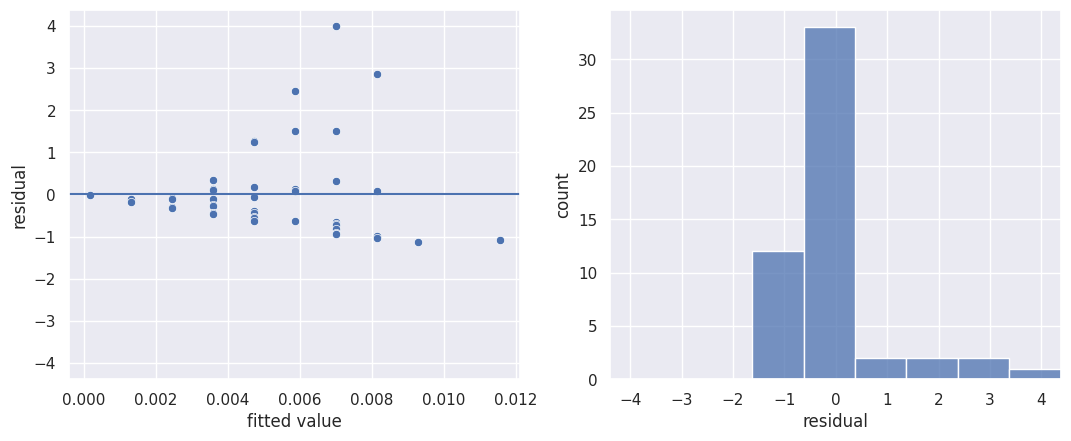

In [36]:
result_hip3.plot_residuals()


## Hipóteses 4: Desenvolvimento tem relação com vazão de pessoas

### C : EXT: DSV, CORE, CONP


#### Explicação:

Essa hipótese correlaciona o desenvolvimento socioeconômico do país (medido pelo IDH) com a vazão de pessoas. Ou seja, quanto menor for o desenvolvimento de uma nação, maior é a sua saída de pessoas, uma vez que, visando melhores condições de vida ou a própria sobrevivência, pessoas podem sair de um país, devido ao seu baixo desenvolvimento, em maior quantidade do que em países com um IDH alto. Além disso, a saída de pessoas também está correlacionada com o coreness e a contenção populacional (variáveis de controle), uma vez que quanto maior a vazão de pessoas, mais ao centro esse país está e menor é a sua contenção populacional.

#### Recorte: 2008 a 2012 e países África

Esse recorte foi pensado pois, ao tratarmos dos anos de 2008 a 2012, pensamos na crise imobiliária dos Estados Unidos que ocorreu em 2008 e, posteriormente, resultou em uma crise econômica global. Além disso, também houve uma pandemia da gripe H1N1 no ano de 2009. Esses dois acontecimentos, juntos, poderiam resultar em uma possível mudança significativa na vazão de pessoas em países com IDH alto, o que deixaria de corroborar com a hipótese 4. Assim, gostaríamos de analisar o reflexo desses eventos nos fluxos migratórios dentro da África.

In [37]:
df_2008_2012_out = df_2008_2012.groupby('origin').sum().reindex(listaVertices).fillna(0)
df_2008_2012_out.sort_values("value", ascending = False)

/tmp/ipykernel_788/2163053283.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2008_2012_out = df_2008_2012.groupby('origin').sum().reindex(listaVertices).fillna(0)


,value,rejected
origin,,
Eritrea,107682.0,15104.0
Myanmar,107568.0,10132.0
Dem. Rep. of the Congo,77502.0,47213.0
Iraq,71266.0,70812.0
Somalia,70458.0,31256.0
...,...,...
Anguilla,0.0,0.0
French Guiana,0.0,0.0
Bonaire,0.0,0.0


In [38]:
g2 = gt_load('/grafo_2008_2012.net.gz')

In [39]:
m = gt_draw.sfdp_layout(g2)
gt_move(g2, m)
gt_save(g2, 'grafo_2008_2012.net.gz')

In [40]:
r2 = netpixi.render('grafo_2008_2012.net.gz', infinite=True);

In [41]:
r2.vertex_set_key('nome')

r2.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r2.edge_default(color=0x20B2AA)

In [42]:
r2.edge_scale('aceitos', 1, 10)

In [43]:
g2 =  gt_load('/grafo_2008_2012.net.gz')

In [44]:
m = gt_draw.sfdp_layout(g2)
gt_move(g2, m)
gt_save(g2, 'centralidadeCoreness20082012.net.gz')

In [45]:
r2 = netpixi.render('centralidadeCoreness20082012.net.gz')

In [46]:
matrix = spectral.adjacency(g2)

# # Além de cpnet.Surprise, há outras
# # opções de algoritmos discretos:
# # cpnet.BE
# # cpnet.Lip
# # cpnet.LapCore
# # cpnet.LapSgnCore
# # cpnet.LowRankCore

algorithm = cpnet.BE()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# # Depois do código acima, c é um dicionário
# # em que as chaves são índices de vértices e
# # valores são os atribuídos pelo algoritmo.

g2.add_vp('coreness')
for i, coreness in c.items():
    v = g2.get_vertex_by_index(i)
    v['coreness'] = int(coreness)
    
# # Vamos pintar de vermelho todos os vértices
# # identificados como centro e de verde todos
# # os vértices identificados como periferia.
    
for v in g2.all_vertices():
    if v['coreness'] == 1:
        r2.vertex(v['id'], color=0xff0000)
    else:
        r2.vertex(v['id'], color=0x00ff00)

# # Quando a execução desta célula terminar,
# # veja como ficou a visualização acima.

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [47]:
r2.edge_scale('aceitos', 1, 10)

r2.vertex_set_key('nome')

r2.vertex_scale('coreness', 5, 25)

In [48]:
df_coreness_2008_2012 = gt_data(g2).sort_values("coreness", ascending = False)
df_coreness_2008_2012

,nome,coreness
id,,
Belgium,Belgium,1
Indonesia,Indonesia,1
Jordan,Jordan,1
Belarus,Belarus,1
Liechtenstein,Liechtenstein,1
...,...,...
Honduras,Honduras,0
Nigeria,Nigeria,0
Singapore,Singapore,0


In [49]:
r2.vertex_set_key('nome')

r2.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r2.edge_default(color=0x20B2AA)

In [50]:
r2.edge_scale('aceitos', 1, 10)

In [51]:
data_idh_2008_2012 = data.loc[:, ['idh_2008_2012', 'country', 'pop_cont']]

data_idh_2008_2012 = data_idh_2008_2012.rename(columns={'idh_2008_2012': 'idh_2008_2012', 'country': 'origin'})
df_coreness_2008_2012 = df_coreness_2008_2012.rename(columns={'nome':'origin'})

df_coreness_2008_2012

,origin,coreness
id,,
Belgium,Belgium,1
Indonesia,Indonesia,1
Jordan,Jordan,1
Belarus,Belarus,1
Liechtenstein,Liechtenstein,1
...,...,...
Honduras,Honduras,0
Nigeria,Nigeria,0
Singapore,Singapore,0


In [52]:
df_intermediario = df_coreness_2008_2012.merge(data_idh_2008_2012, on="origin", how="left")
df_intermediario = df_intermediario.merge(df_2008_2012_out, on="origin", how="left")
df_intermediario

,origin,coreness,idh_2008_2012,pop_cont,value,rejected
0,Belgium,1,0.9094,0,31.0,47.0
1,Indonesia,1,0.6648,0,1568.0,4576.0
2,Jordan,1,0.7388,1,510.0,2032.0
3,Belarus,1,0.7932,0,1515.0,4829.0
4,Liechtenstein,1,0.9038,0,0.0,0.0
...,...,...,...,...,...,...
220,Honduras,0,0.6086,0,1229.0,3156.0
221,Nigeria,0,0.4896,0,4352.0,66513.0
222,Singapore,0,0.9032,0,22.0,69.0
223,Bolivia (Plurinational State of),0,0.6668,0,288.0,1115.0


In [53]:
df_filtrado_idh_2008_2012 = df_intermediario[(df_intermediario['origin'].isin(lista_paises_africa))]
df_filtrado_idh_2008_2012

,origin,coreness,idh_2008_2012,pop_cont,value,rejected
6,South Africa,1,0.6610,0,130.0,1612.0
12,Egypt,1,0.6676,0,5581.0,8799.0
22,Sudan,1,0.4716,0,24449.0,13899.0
24,Côte d'Ivoire,1,0.4678,0,12827.0,14862.0
34,Benin,1,0.4948,0,89.0,1108.0
37,Cameroon,1,0.5064,0,3796.0,11107.0
38,Senegal,1,0.4688,0,830.0,6176.0
42,Tunisia,1,0.7140,1,297.0,7886.0
49,Congo,1,0.5184,0,3048.0,11310.0
55,Kenya,1,0.5498,0,2422.0,5130.0


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_filtrado_idh_2008_2012, correlacionando o valor da saída de pessoas com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (value) é um valor contínuo.

In [54]:
result_hip4 = reg.linear(data=df_filtrado_idh_2008_2012, formula='np.log1p(value) ~ idh_2008_2012 + coreness + pop_cont')
result_hip4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log1p(value)   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     4.806
Date:                Sun, 20 Nov 2022   Prob (F-statistic):            0.00525
Time:                        19:46:37   Log-Likelihood:                -116.49
No. Observations:                  52   AIC:                             241.0
Df Residuals:                      48   BIC:                             248.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.7298      1.551      7.562      0.000       8.611      14.848
idh_2008_2012   -11.3887      3.148     -3.617      0.001     -17.719      -5.059
coreness          1.9081      0.789      2.418      0.019       0.321       3.495
pop_cont          0.1908      2.483      0.077      0.939      -4.802       5.184
==============================================================================
Omnibus:                        0.967   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.714
Skew:                          -0.286   Prob(JB):                        0.700
Kurtosis:                       2.954   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
result_hip4.nano_summary()

-11.389 (3.148) ***
+01.908 (0.789) **
+00.191 (2.483)


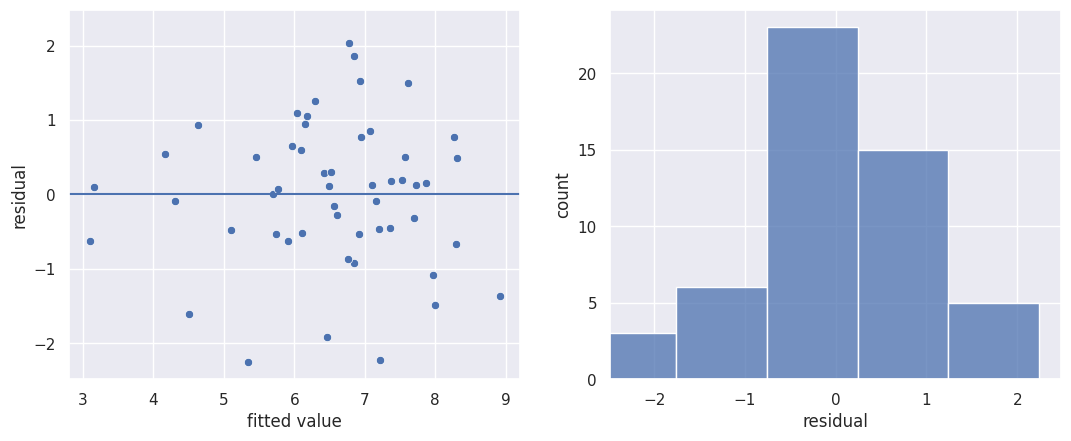

In [56]:
result_hip4.plot_residuals()


## Hipóteses 5: Abertura tem relação com chegada de pessoas

### H : IN: OPEN, EXT, CORE

#### Explicação:

Essa hipótese correlaciona a abertura de um país com a entrada de pessoas. Ou seja, quanto maior for a abertura de um país, mais pessoas chegam até ele. Ou seja, quanto mais fácil for de entrar nas fronteiras de uma nação, maior será o número de pessoas capazes de buscar refúgio nesses países. Além disso, a chegada de pessoas também está relacionada com a saída de pessoas e o coreness (variáveis de controle), uma vez que quanto maior a saída de pessoas de um país, mais pessoas chegarão em outros países, além de que quanto maior a entrada de pessoas, maior é o seu coreness. 


#### Recorte: 2008 a 2012 e países da África

Esse recorte foi pensado pois, ao tratarmos dos anos de 2008 a 2012, pensamos na crise imobiliária dos Estados Unidos que ocorreu em 2008 e, posteriormente, resultou em uma crise econômica global. Além disso, também houve uma pandemia da gripe H1N1 no ano de 2009. Esses dois acontecimentos, juntos, poderiam resultar em uma possível mudança significativa na abertura de países que foram mais afetados geopoliticamente com essas crises, como foram os casos de países da Europa e da América do Norte, chegando a uma menor abertura desses países, já que houve uma maior restrição na entrada de pessoas por conta do aumento do risco de contaminação da H1N1 e por também não estarem em condições financeiras favoráveis a entrada de ainda mais pessoas em seu território. Com isso, gostaríamos de analisar o resultado dessas atividades nos fluxos migratórios dentro da África.

In [57]:
df_indegree_2008_2012 = df_2008_2012.groupby('destiny').sum().reindex(listaVertices).fillna(0)
df_indegree_2008_2012 = df_indegree_2008_2012.sort_values("value", ascending = False)
df_indegree_2008_2012 = df_indegree_2008_2012.reset_index()
df_indegree_2008_2012 = df_indegree_2008_2012.rename(columns={'destiny': 'country', 'value':'in_degree'})
df_indegree_2008_2012

/tmp/ipykernel_788/3610552243.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_indegree_2008_2012 = df_2008_2012.groupby('destiny').sum().reindex(listaVertices).fillna(0)


,country,in_degree,rejected
0,United States of America,104356.0,74546.0
1,Malaysia,93752.0,4685.0
2,France,54791.0,267437.0
3,Canada,54290.0,60789.0
4,Sudan,51213.0,845.0
...,...,...,...
220,Tuvalu,0.0,0.0
221,Holy See (the),0.0,0.0
222,Various/Unknown,0.0,0.0
223,San Marino,0.0,0.0


In [58]:
df_intermediario = df_intermediario.drop('rejected', axis=1)
df_intermediario = df_intermediario.rename(columns={'origin': 'country', 'value':'out_degree'})
df_intermediario = df_intermediario.merge(df_indegree_2008_2012, on="country", how="left")
df_intermediario

,country,coreness,idh_2008_2012,pop_cont,out_degree,in_degree,rejected
0,Belgium,1,0.9094,0,31.0,16714.0,91631.0
1,Indonesia,1,0.6648,0,1568.0,3424.0,271.0
2,Jordan,1,0.7388,1,510.0,2518.0,2486.0
3,Belarus,1,0.7932,0,1515.0,88.0,529.0
4,Liechtenstein,1,0.9038,0,0.0,20.0,217.0
...,...,...,...,...,...,...,...
220,Honduras,0,0.6086,0,1229.0,18.0,0.0
221,Nigeria,0,0.4896,0,4352.0,353.0,376.0
222,Singapore,0,0.9032,0,22.0,16.0,4.0
223,Bolivia (Plurinational State of),0,0.6668,0,288.0,95.0,70.0


In [59]:
df_2008_2012_inout = df_intermediario.drop(['pop_cont','idh_2008_2012'], axis=1)
df_2008_2012_inout['open'] = (df_2008_2012_inout['in_degree']/(df_2008_2012_inout['in_degree'] + df_2008_2012_inout['rejected']))*100
df_2008_2012_inout['open'] = df_2008_2012_inout['open'].fillna(0)
df_2008_2012_inout

,country,coreness,out_degree,in_degree,rejected,open
0,Belgium,1,31.0,16714.0,91631.0,15.426646
1,Indonesia,1,1568.0,3424.0,271.0,92.665765
2,Jordan,1,510.0,2518.0,2486.0,50.319744
3,Belarus,1,1515.0,88.0,529.0,14.262561
4,Liechtenstein,1,0.0,20.0,217.0,8.438819
...,...,...,...,...,...,...
220,Honduras,0,1229.0,18.0,0.0,100.000000
221,Nigeria,0,4352.0,353.0,376.0,48.422497
222,Singapore,0,22.0,16.0,4.0,80.000000
223,Bolivia (Plurinational State of),0,288.0,95.0,70.0,57.575758


In [61]:
df_2008_2012_inout_eu_america =  df_2008_2012_inout[(df_2008_2012_inout['country'].isin(lista_paises_africa))]
df_2008_2012_inout_eu_america

,country,coreness,out_degree,in_degree,rejected,open
6,South Africa,1,130.0,36451.0,309145.0,10.547286
12,Egypt,1,5581.0,7406.0,3197.0,69.848156
22,Sudan,1,24449.0,51213.0,845.0,98.376810
24,Côte d'Ivoire,1,12827.0,159.0,940.0,14.467698
34,Benin,1,89.0,508.0,1331.0,27.623709
37,Cameroon,1,3796.0,4968.0,3687.0,57.400347
38,Senegal,1,830.0,32.0,455.0,6.570842
42,Tunisia,1,297.0,3941.0,596.0,86.863566
49,Congo,1,3048.0,290.0,1246.0,18.880208
55,Kenya,1,2422.0,23677.0,7029.0,77.108708


#### Regressão

Com os resultados obtidos no processo acima, obtivemos a tabela logo acima dessa célula, a df_2008_2012_inout_eu_america, correlacionando o valor do in_degree com o recorte proposto e, para podermos analisar se o recorte realmente faz sentido e faria com que a hipótese não corroborasse mais, precisamos realizar uma regressão linear, uma vez que a variável dependente (in_degree) é um valor contínuo (métrica).

In [62]:
result_hip5 = reg.linear(data=df_2008_2012_inout_eu_america, formula='np.log1p(in_degree) ~ open + coreness + out_degree')
result_hip5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log1p(in_degree)   R-squared:                       0.686
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     34.94
Date:                 Sun, 20 Nov 2022   Prob (F-statistic):           3.98e-12
Time:                         19:48:38   Log-Likelihood:                -106.27
No. Observations:                   52   AIC:                             220.5
Df Residuals:                       48   BIC:                             228.4
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3553      0.502      2.698      0.010       0.345       2.365
open           0.0666      0.007      9.003      0.000       0.052       0.081
coreness       2.8119      0.590      4.767      0.000       1.626       3.998
out_degree  5.391e-06   1.32e-05      0.407      0.686   -2.12e-05     3.2e-05
==============================================================================
Omnibus:                        4.049   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                4.320
Skew:                           0.039   Prob(JB):                        0.115
Kurtosis:                       4.410   Cond. No.                     5.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
result_hip5.nano_summary()

+0.067 (0.007) ***
+2.812 (0.590) ***
+0.000 (0.000)


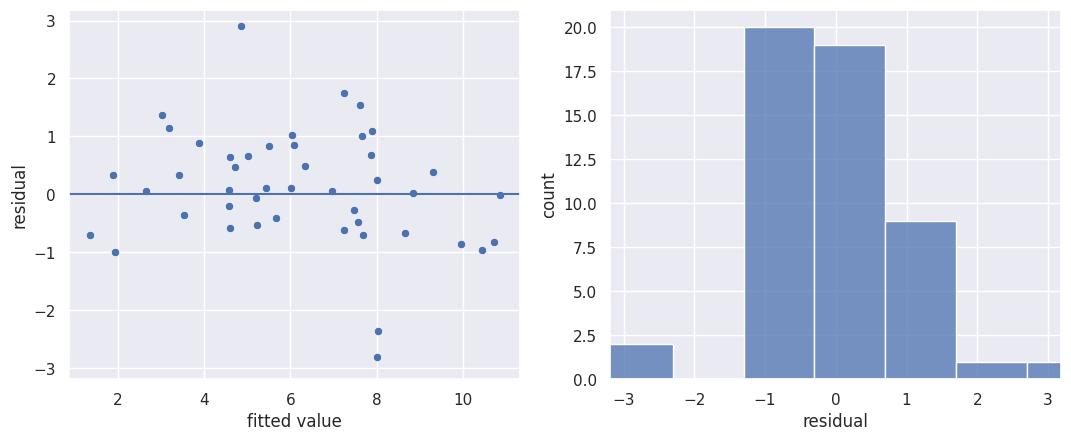

In [64]:
result_hip5.plot_residuals()


# Países da África

## Sem recortes de ano

-------------------------------------------------------------------------------------------------------------------------------


## Hipótese 2: Localização tem relação com centro

In [65]:
df_aresta = df_completo.loc[:, ['Country / territory of asylum/residence', 'Origin', 'decisions_recognized', 'Rejected', 'Year']]
df_aresta = df_aresta.rename(columns={'Origin': 'origin', 'Country / territory of asylum/residence': 'destiny', 'decisions_recognized': 'value', 'Rejected': 'rejected','Year' : 'year'})
df_aresta

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5,0,2000
1,South Africa,Afghanistan,0,0,2000
2,Uzbekistan,Afghanistan,747,112,2000
3,United States of America,Afghanistan,151,31,2000
4,United States of America,Afghanistan,182,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16,*,2016
129716,United States of America,Zimbabwe,*,*,2016
129717,South Africa,Zimbabwe,NaN,NaN,2016
129718,South Africa,Zimbabwe,73,7869,2016


In [66]:
df_aresta.value = pd.to_numeric(df_aresta['value'], errors = 'coerce').fillna(0)
df_aresta

,destiny,origin,value,rejected,year
0,Zimbabwe,Afghanistan,5.0,0,2000
1,South Africa,Afghanistan,0.0,0,2000
2,Uzbekistan,Afghanistan,747.0,112,2000
3,United States of America,Afghanistan,151.0,31,2000
4,United States of America,Afghanistan,182.0,51,2000
...,...,...,...,...,...
129715,United States of America,Zimbabwe,16.0,*,2016
129716,United States of America,Zimbabwe,0.0,*,2016
129717,South Africa,Zimbabwe,0.0,NaN,2016
129718,South Africa,Zimbabwe,73.0,7869,2016


In [67]:
df_aresta = df_aresta.drop('year', axis=1)
df_aresta = df_aresta.replace("*", 0)
df_aresta = df_aresta.fillna(0)

df_aresta.value = df_aresta['value'].astype(int)
df_aresta.rejected = df_aresta['rejected'].astype(int)


In [68]:
df_aresta = df_aresta[df_aresta['origin'] != df_aresta['destiny']]
df_aresta

,destiny,origin,value,rejected
0,Zimbabwe,Afghanistan,5,0
1,South Africa,Afghanistan,0,0
2,Uzbekistan,Afghanistan,747,112
3,United States of America,Afghanistan,151,31
4,United States of America,Afghanistan,182,51
...,...,...,...,...
129715,United States of America,Zimbabwe,16,0
129716,United States of America,Zimbabwe,0,0
129717,South Africa,Zimbabwe,0,0
129718,South Africa,Zimbabwe,73,7869


In [69]:
df_aresta = df_aresta.groupby(['origin', 'destiny']).sum().reset_index()
df_aresta

,origin,destiny,value,rejected
0,Afghanistan,Albania,3,0
1,Afghanistan,Algeria,2,0
2,Afghanistan,Angola,0,2
3,Afghanistan,Argentina,5,0
4,Afghanistan,Armenia,0,5
...,...,...,...,...
11058,Zimbabwe,United Kingdom,15429,42181
11059,Zimbabwe,United Rep. of Tanzania,1,0
11060,Zimbabwe,United States of America,1722,1583
11061,Zimbabwe,Uruguay,1,0


In [70]:
g = gt_load('/grafo_2008_2012.net.gz')

In [71]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'grafo_2008_2012.net.gz')

In [72]:
r = netpixi.render('grafo_2008_2012.net.gz', infinite=True);

In [73]:
r.vertex_set_key('nome')

r.vertex_default(color=0xffffff)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x20B2AA)

In [74]:
r.edge_scale('aceitos', 1, 10)

In [76]:
matrix = spectral.adjacency(g)

# # Além de cpnet.Surprise, há outras
# # opções de algoritmos discretos:
# # cpnet.BE
# # cpnet.Lip
# # cpnet.LapCore
# # cpnet.LapSgnCore
# # cpnet.LowRankCore

algorithm = cpnet.BE()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# # Depois do código acima, c é um dicionário
# # em que as chaves são índices de vértices e
# # valores são os atribuídos pelo algoritmo.

g.add_vp('coreness')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = int(coreness)
    
# # Vamos pintar de vermelho todos os vértices
# # identificados como centro e de verde todos
# # os vértices identificados como periferia.
    
for v in g.all_vertices():
    if v['coreness'] == 1:
        r.vertex(v['id'], color=0xff0000)
    else:
        r.vertex(v['id'], color=0x00ff00)

# # Quando a execução desta célula terminar,
# # veja como ficou a visualização acima.

In [77]:
r.edge_scale('aceitos', 1, 10)

r.vertex_set_key('nome')

r.vertex_scale('coreness', 5, 25)

In [78]:
df_coreness_africa = gt_data(g).sort_values("coreness", ascending = False)
df_coreness_africa

,nome,coreness
id,,
Belgium,Belgium,1
Indonesia,Indonesia,1
Jordan,Jordan,1
Belarus,Belarus,1
Liechtenstein,Liechtenstein,1
...,...,...
Honduras,Honduras,0
Nigeria,Nigeria,0
Singapore,Singapore,0


In [79]:
data_neighboors_countries = data.loc[:, ['n_neightbours', 'country']]

data_neighboors_countries = data_neighboors_countries.rename(columns={'n_neightbours': 'n_neightbours', 'country': 'origin'})

df_coreness_africa = df_coreness_africa.rename(columns={'nome': 'origin'})
df_coreness_africa

,origin,coreness
id,,
Belgium,Belgium,1
Indonesia,Indonesia,1
Jordan,Jordan,1
Belarus,Belarus,1
Liechtenstein,Liechtenstein,1
...,...,...
Honduras,Honduras,0
Nigeria,Nigeria,0
Singapore,Singapore,0


In [80]:
df_coreness_africa = df_coreness_africa.merge(data_neighboors_countries, on="origin", how="left")
df_coreness_africa

,origin,coreness,n_neightbours
0,Belgium,1,4
1,Indonesia,1,3
2,Jordan,1,5
3,Belarus,1,5
4,Liechtenstein,1,2
...,...,...,...
220,Honduras,0,3
221,Nigeria,0,4
222,Singapore,0,0
223,Bolivia (Plurinational State of),0,5


In [81]:
df_coreness_africa =  df_coreness_africa[(df_coreness_africa['origin'].isin(lista_paises_africa))]
df_coreness_africa

,origin,coreness,n_neightbours
6,South Africa,1,6
12,Egypt,1,4
22,Sudan,1,7
24,Côte d'Ivoire,1,5
34,Benin,1,4
37,Cameroon,1,6
38,Senegal,1,5
42,Tunisia,1,2
49,Congo,1,5
55,Kenya,1,5


In [82]:
result_hip2_africa = reg.logistic(data=df_coreness_africa, formula='coreness ~ n_neightbours')
result_hip2_africa.summary()

Optimization terminated successfully.
         Current function value: 0.591579
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               coreness   No. Observations:                   52
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                 0.04158
Time:                        19:55:52   Log-Likelihood:                -30.762
converged:                       True   LL-Null:                       -32.097
Covariance Type:            nonrobust   LLR p-value:                    0.1023
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.7446      0.694     -2.512      0.012      -3.106      -0.383
n_neightbours     0.2225      0.142      1.572      0.116      -0.055       0.500
=================================================================================
"""

In [83]:
result_hip2_africa.nano_summary()

+0.223 (0.142)


62.5% of average residuals inside


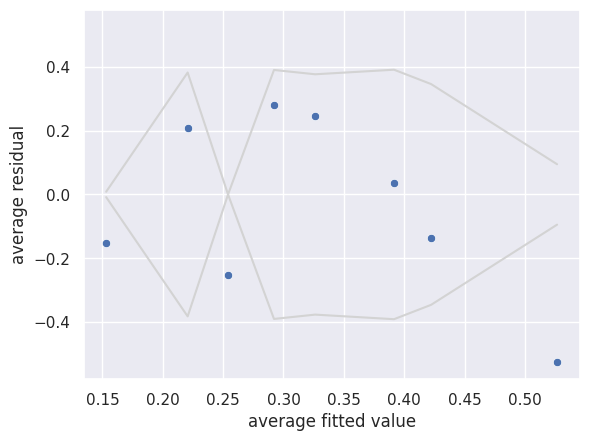

In [84]:
result_hip2_africa.plot_residuals()